In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    BatchNormalization,
    LeakyReLU,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
)
from tensorflow.keras import layers, models


from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [55]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [56]:
!ls "content/drive/My Drive/"


ls: cannot access 'content/drive/My Drive/': No such file or directory


In [57]:

train_dir = "/content/drive/MyDrive/flowers-20241116T133430Z-001/flowers/train/"
test_dir = "/content/drive/MyDrive/flowers-20241116T133430Z-001/flowers/test/"


In [75]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set image shape and batch size
image_shape = (100, 100)
batch_size = 128

# Augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Reserve 20% of training data for validation
)

# Only rescaling for validation and test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data with augmentation
print("Training Images:")
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

# Load validation data (20% of training data)
print("Validating Images:")
valid_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

# Load test data (consider validation data as test data)
print("Test Images:")
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Training Images:
Found 2514 images belonging to 5 classes.
Validating Images:
Found 626 images belonging to 5 classes.
Test Images:
Found 1228 images belonging to 5 classes.


In [76]:
# Extract class names from the datasets using class_indices
train_class_names = list(train_data.class_indices.keys())
valid_class_names = list(valid_data.class_indices.keys())
test_class_names = list(test_data.class_indices.keys())

# Print class names
print("Training Class Names:", train_class_names)
print("Validation Class Names:", valid_class_names)
print("Test Class Names:", test_class_names)

# Print the number of classes
print("Number of Training Classes:", len(train_class_names))
print("Number of Validation Classes:", len(valid_class_names))
print("Number of Test Classes:", len(test_class_names))

Training Class Names: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Validation Class Names: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Test Class Names: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Number of Training Classes: 5
Number of Validation Classes: 5
Number of Test Classes: 5


In [77]:
class_names = train_class_names


In [78]:
import keras

model = keras.Sequential()

In [79]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │       2,166,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,186,565 (8.34 MB)

 Trainable params: 2,186,565 (8.34 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
# Compile the Model
loss_fn = CategoricalCrossentropy(label_smoothing=0.1)
optimizer = Adam(learning_rate=1e-4)
model.compile(loss=loss_fn, optimizer=optimizer, metrics=['accuracy'])

# Callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
callbacks = [early_stopping, reduce_lr]

In [82]:

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',        # Monitor validation loss
    patience=10,               # Number of epochs with no improvement after which training will stop
    restore_best_weights=True  # Restore model weights from the epoch with the best validation loss
)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model with early stopping
history = model.fit(
    train_data,
    epochs=100,
    batch_size = 128,
    validation_data=valid_data,
    callbacks= [early_stopping, reduce_lr]
)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.2857 - loss: 1.5736 - val_accuracy: 0.4185 - val_loss: 1.4526 - learning_rate: 1.0000e-04
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 873ms/step - accuracy: 0.4129 - loss: 1.4326 - val_accuracy: 0.4489 - val_loss: 1.3638 - learning_rate: 1.0000e-04
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.4607 - loss: 1.3549 - val_accuracy: 0.4696 - val_loss: 1.3198 - learning_rate: 1.0000e-04
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 866ms/step - accuracy: 0.4882 - loss: 1.3073 - val_accuracy: 0.4968 - val_loss: 1.2953 - learning_rate: 1.0000e-04
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 867ms/step - accuracy: 0.4913 - loss: 1.2889 - val_accuracy: 0.4696 - val_loss: 1.3169 - learning_rate: 1.0000e-04
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 853ms/step - accuracy: 0.4888 - loss: 1.2879 - val_accuracy: 0.4968 - val_loss: 1.2930 - learning_rate: 1.0000e-04
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 856ms/step - accuracy: 0.50

# Testing and Evaluation


In [83]:
Y_pred = model.predict(test_data)
score = model.evaluate(test_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 559ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 664ms/step - accuracy: 0.6659 - loss: 1.0823
Test loss: 1.0279757976531982
Test accuracy: 0.6775244474411011


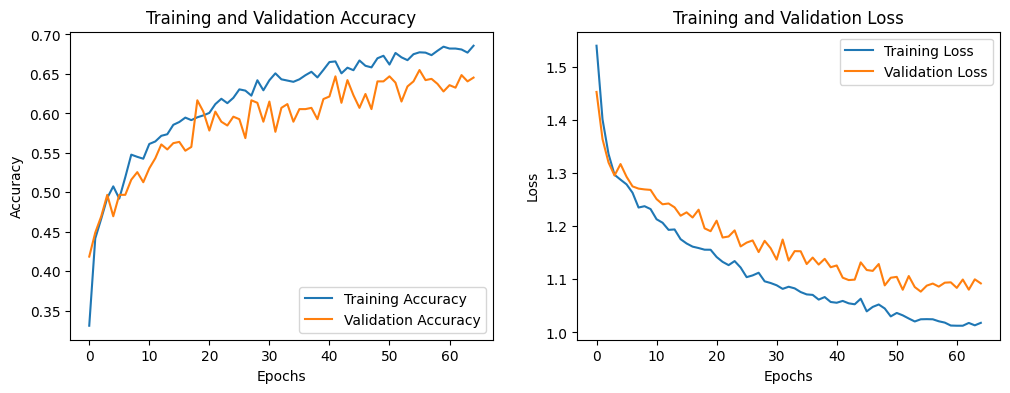

In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np

# Define class names (replace these with actual class names if available)
CLASS_NAMES = class_names

# Function to plot accuracy and loss curves
def plot_training_curves(history):
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

# Call the function to plot curves
plot_training_curves(history)


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 898ms/step
Classification Report:
               precision    recall  f1-score   support

       daisy       0.68      0.64      0.66       108
   dandelion       0.67      0.71      0.69       164
        rose       0.42      0.49      0.45       108
   sunflower       0.75      0.65      0.70        98
       tulip       0.61      0.58      0.60       148

    accuracy                           0.62       626
   macro avg       0.63      0.62      0.62       626
weighted avg       0.63      0.62      0.62       626

Precision: 0.6292, Recall: 0.6214, F1 Score: 0.6240


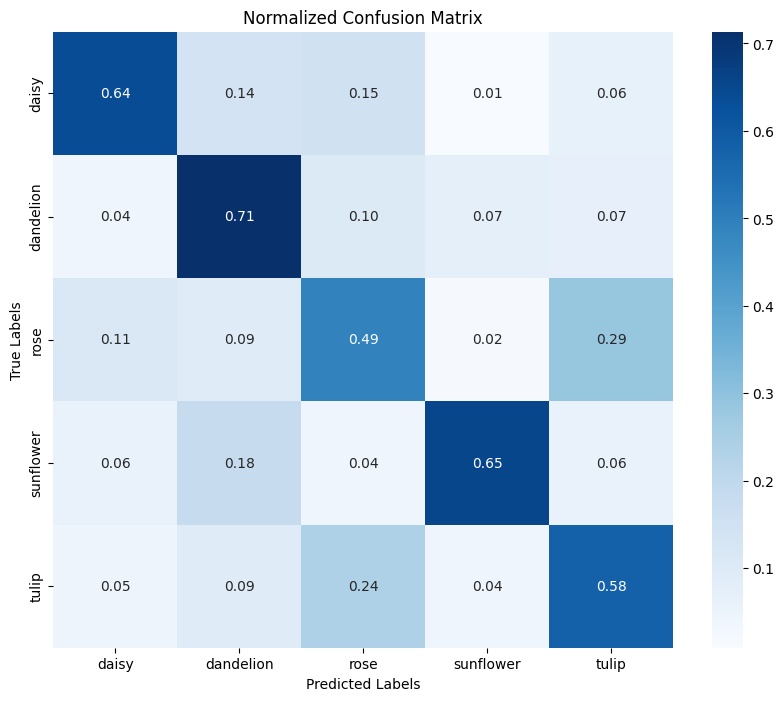

In [85]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Predict on validation data
Y_pred = model.predict(valid_data)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = valid_data.classes  # Actual class labels from validation data

# Generate a classification report
CLASS_NAMES = list(valid_data.class_indices.keys())  # Extract class names from validation data generator
print("Classification Report:\n", classification_report(Y_true, Y_pred_classes, target_names=class_names))

# Calculate precision, recall, and F1-score
precision = precision_score(Y_true, Y_pred_classes, average='weighted')
recall = recall_score(Y_true, Y_pred_classes, average='weighted')
f1 = f1_score(Y_true, Y_pred_classes, average='weighted')
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

# Calculate normalized confusion matrix
conf_matrix = confusion_matrix(Y_true, Y_pred_classes, normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names, fmt='.2f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()